In [7]:
import requests
import json 
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo 
import os

url = "https://www.stackoverflow.com"
response = requests.get(url)

In [12]:
response

<Response [200]>

In [13]:
response.status_code

200

In [2]:
print(response.text)


<!DOCTYPE html>


    <html class="html__responsive " lang="en">

    <head>

        <title>Stack Overflow - Where Developers Learn, Share, &amp; Build Careers</title>
        <link rel="shortcut icon" href="https://cdn.sstatic.net/Sites/stackoverflow/Img/favicon.ico?v=ec617d715196">
        <link rel="apple-touch-icon" href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a">
        <link rel="image_src" href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a"> 
        <link rel="search" type="application/opensearchdescription+xml" title="Stack Overflow" href="/opensearch.xml">
        <meta name="description" content="Stack Overflow is the largest, most trusted online community for developers to learn, share&#x200B; &#x200B;their programming &#x200B;knowledge, and build their careers."/>
    <meta name="viewport" content="width=device-width, height=device-height, initial-scale=1.0, minimum-scale=1.0">
        <me

In [3]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(response.text, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="html__responsive" lang="en">
 <head>
  <title>
   Stack Overflow - Where Developers Learn, Share, &amp; Build Careers
  </title>
  <link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/favicon.ico?v=ec617d715196" rel="shortcut icon"/>
  <link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a" rel="apple-touch-icon"/>
  <link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a" rel="image_src"/>
  <link href="/opensearch.xml" rel="search" title="Stack Overflow" type="application/opensearchdescription+xml"/>
  <meta content="Stack Overflow is the largest, most trusted online community for developers to learn, share​ ​their programming ​knowledge, and build their careers." name="description"/>
  <meta content="width=device-width, height=device-height, initial-scale=1.0, minimum-scale=1.0" name="viewport"/>
  <meta content="noarchive" name="bingbot"/>
  <meta content="website" p

In [4]:
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame

# No keys required for crypto data
client = CryptoHistoricalDataClient()

# Creating request object
request_params = CryptoBarsRequest(
  symbol_or_symbols=["BTC/USD"],
  timeframe=TimeFrame.Day,
  start="2022-09-01",
  end="2024-08-05")

request_params

NameError: name 'CryptoHistoricalDataClient' is not defined

In [10]:
# Retrieve daily bars for Bitcoin in a DataFrame and printing it
btc_bars = client.get_crypto_bars(request_params)

# Convert to dataframe
df = btc_bars.df
# Reset the index to drop the current index
df.reset_index(inplace=True)

# Set the timestamp column back as the index
df.set_index('timestamp', inplace=True)
df

NameError: name 'client' is not defined

In [5]:
def plot_data(df, title):
    plt.style.use('seaborn-v0_8')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    df['close'].plot()
    plt.show()

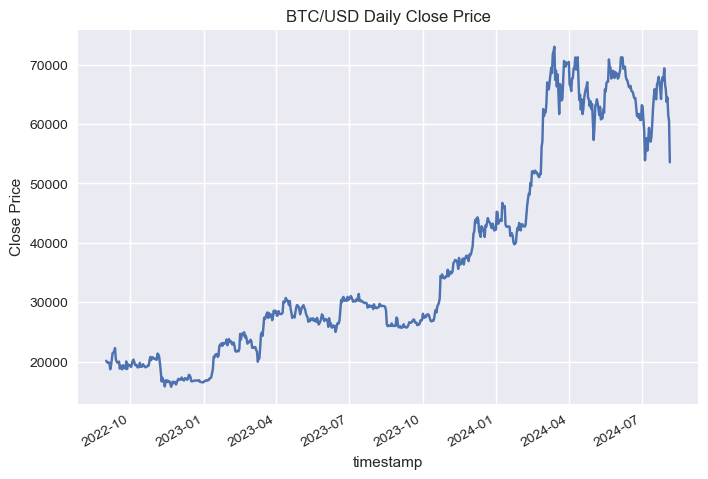

In [15]:
plot_data(df, title='BTC/USD Daily Close Price')

In [ ]:
for key, value in os.environ.items():
    if key.startswith('APCA'):
        print(f"{key}={value}") 

In [9]:
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame
from alpaca.data.historical import StockHistoricalDataClient
import os 
from matplotlib import pyplot as plt
from datetime import datetime 

# Create today's date
today = datetime.now().strftime("%Y-%m-%d")

# Set up Alpaca API keys
api_key_id = os.getenv('APCA_API_KEY')
api_secret_key = os.getenv('APCA_API_SECRET_KEY')

# Create a client for stock historical data
client = StockHistoricalDataClient(api_key=api_key_id, 
                                   secret_key=api_secret_key)

# Creating request object for stock data
request_params = StockBarsRequest(
  symbol_or_symbols=["AAPL"],
  timeframe=TimeFrame.Day,
  start="1980-09-01",
  adjustment='split',
  end=today
)

# Fetch the data
response = client.get_stock_bars(request_params)

# Print the response
print(response)

data={'AAPL': [{   'close': 26.34,
    'high': 26.34,
    'low': 25.5,
    'open': 25.65,
    'symbol': 'AAPL',
    'timestamp': datetime.datetime(2016, 1, 4, 5, 0, tzinfo=TzInfo(UTC)),
    'trade_count': 351452.0,
    'volume': 287741356.0,
    'vwap': 26.02}, {   'close': 25.68,
    'high': 26.46,
    'low': 25.6,
    'open': 26.44,
    'symbol': 'AAPL',
    'timestamp': datetime.datetime(2016, 1, 5, 5, 0, tzinfo=TzInfo(UTC)),
    'trade_count': 321365.0,
    'volume': 234762144.0,
    'vwap': 25.85}, {   'close': 25.18,
    'high': 25.59,
    'low': 24.97,
    'open': 25.14,
    'symbol': 'AAPL',
    'timestamp': datetime.datetime(2016, 1, 6, 5, 0, tzinfo=TzInfo(UTC)),
    'trade_count': 409164.0,
    'volume': 284319308.0,
    'vwap': 25.21}, {   'close': 24.11,
    'high': 25.03,
    'low': 24.11,
    'open': 24.67,
    'symbol': 'AAPL',
    'timestamp': datetime.datetime(2016, 1, 7, 5, 0, tzinfo=TzInfo(UTC)),
    'trade_count': 462836.0,
    'volume': 343985812.0,
    'vwap': 24.

In [10]:
df_apple = response.df
df_apple.reset_index(inplace=True)
df_apple.set_index('timestamp', inplace=True)
df_apple.tail()

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2024-08-12 04:00:00+00:00,AAPL,216.07,219.5099,215.6000,217.53,38028092.0,602530.0,217.546527
2024-08-13 04:00:00+00:00,AAPL,219.01,221.8900,219.0100,221.27,44155331.0,553265.0,220.875752
2024-08-14 04:00:00+00:00,AAPL,220.57,223.0300,219.7000,221.72,41960574.0,568519.0,221.510785
2024-08-15 04:00:00+00:00,AAPL,224.60,225.3500,222.7600,224.72,46414013.0,590575.0,224.550284
2024-08-16 04:00:00+00:00,AAPL,223.92,226.8271,223.6501,226.05,44340240.0,562638.0,225.430556


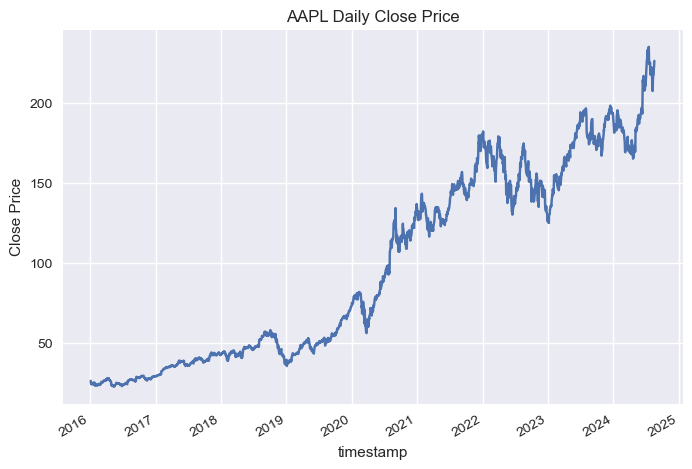

In [11]:
plot_data(df=df_apple, title='AAPL Daily Close Price')

In [12]:
data = [go.Scatter(x=df_apple.index, 
                   y=df_apple['close'],
                   mode='lines',
                   marker=dict(color='steelblue'))]
layout = go.Layout(title='APPLE Daily Close Price',
                   title_x=0.5,
                   xaxis_title='Date',
                   yaxis_title='Close Price',
                   hovermode='closest')
fig = go.Figure(data=data, layout=layout)
fig.show()

In [13]:
import plotly.graph_objs as go
import pandas as pd

# Sample DataFrame (assuming df_apple is already defined and contains the necessary data)
# For demonstration purposes, let's create a sample DataFrame
data = {
    'date': pd.date_range(start='2022-09-01', end='2023-09-01', freq='B'),
    'close': pd.Series(range(100, 100 + len(pd.date_range(start='2022-09-01', end='2023-09-01', freq='B'))))
}
# df_apple = pd.DataFrame(data)
# df_apple.set_index('close', inplace=True)

# Define significant events
annotations = [
    dict(
        x='2022-09-07',  # Example date
        y=df_apple.loc['2022-09-07', 'close'],
        xref='x',
        yref='y',
        text='Event 1: New iPhone Release',
        showarrow=True,
        arrowhead=2,
        ax=-50,
        ay=-50
    ),
    dict(
        x='2023-01-27',  # Example date
        y=df_apple.loc['2023-01-27', 'close'],
        xref='x',
        yref='y',
        text='Event 2: Quarterly Earnings',
        showarrow=True,
        arrowhead=2,
        ax=-50,
        ay=-50
    )
]

data = [go.Scatter(x=df_apple.index, 
                   y=df_apple['close'],
                   mode='lines',
                   marker=dict(color='steelblue'))]

layout = go.Layout(
    title=dict(
        text='APPLE Daily Close Price',
        x=0.5,
        font=dict(size=24)  # Make the title larger
    ),
    xaxis_title='Date',
    yaxis_title='Close Price',
    hovermode='closest',
    annotations=annotations  # Add annotations to the layout
)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [14]:
df_apple

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2016-01-04 05:00:00+00:00,AAPL,25.65,26.3400,25.5000,26.34,287741356.0,351452.0,26.020000
2016-01-05 05:00:00+00:00,AAPL,26.44,26.4600,25.6000,25.68,234762144.0,321365.0,25.850000
2016-01-06 05:00:00+00:00,AAPL,25.14,25.5900,24.9700,25.18,284319308.0,409164.0,25.210000
2016-01-07 05:00:00+00:00,AAPL,24.67,25.0300,24.1100,24.11,343985812.0,462836.0,24.500000
2016-01-08 05:00:00+00:00,AAPL,24.64,24.7800,24.1900,24.24,300265168.0,419555.0,24.470000
...,...,...,...,...,...,...,...,...
2024-08-12 04:00:00+00:00,AAPL,216.07,219.5099,215.6000,217.53,38028092.0,602530.0,217.546527
2024-08-13 04:00:00+00:00,AAPL,219.01,221.8900,219.0100,221.27,44155331.0,553265.0,220.875752
2024-08-14 04:00:00+00:00,AAPL,220.57,223.0300,219.7000,221.72,41960574.0,568519.0,221.510785
